<a href="https://colab.research.google.com/github/Titas23/IS-170-Machine-Learning/blob/5.-Principal-Component-Analysis/PCA_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Andres Perez

In [ ]:
# from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_california_housing

In [ ]:
# housing= fetch_california_housing()
housing= fetch_california_housing()
housing_data=housing.data

In [ ]:
housing.data.shape

(20640, 8)

In [ ]:
housing_labels=housing.target

In [ ]:
#Let's concatenate the data and labels together for a Dataframe (CSV format)
import numpy as np
labels = np.reshape(housing_labels, (20640,1))
final_housing_data=np.concatenate([housing_data,labels],axis=1)
final_housing_data.shape

(20640, 9)

In [ ]:
#changes to dataframe
import pandas as pd
housing_dataset = pd.DataFrame(final_housing_data)

In [ ]:
#let's check the features
features=housing.feature_names
features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
#label is missing, so add it here
features_labels=np.append(features,'label')
#add the column names to the dataframe
housing_dataset.columns=features_labels
housing_dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,label
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
housing_dataset.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,label
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [ ]:
#Before we do the data visualization, we'll normalize the data.
#The data normalization is a common practice 
#StandardScaler is the normalizing function.
#After the normalization, we'll do fit_transform on the data.
from sklearn.preprocessing import StandardScaler
x=housing_dataset.loc[:,features].values
x=StandardScaler().fit_transform(x) 

In [ ]:
x.shape

(20640, 8)

In [ ]:
#normalized data has a mean of zero and a standard deviation of one
np.mean(x), np.std(x)

(-1.1890574657535784e-15, 0.9999999999999999)

In [ ]:
#converting the normalized features into a dataframe form
feat_cols=['feature'+str(i) for i in range(x.shape[1])]
normalized_housing=pd.DataFrame(x,columns=feat_cols)
normalized_housing.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


In [ ]:
#For the PCA, we'll try components 2
from sklearn.decomposition import PCA
pca_housing=PCA(n_components=2)
principalComponents_housing=pca_housing.fit_transform(x)

In [ ]:
principal_housing_DF=pd.DataFrame(data=principalComponents_housing, columns=['principal component1', 'principal component2' ])

In [ ]:
principal_housing_DF.head()

,principal component1,principal component2
0,1.882704,-0.503362
1,1.371120,-0.121406
2,2.086868,-0.501136
3,1.575801,-1.239495
4,1.591206,-1.345264


In [ ]:
print('Explained variation per principal component: {}'.format(pca_housing.explained_variance_ratio_))

Explained variation per principal component: [0.25336868 0.23516245]


The results above tells us that the principal component 1 holds 25.3% of the information and the principal component 2 holds 23.5%. 

<Figure size 432x288 with 0 Axes>

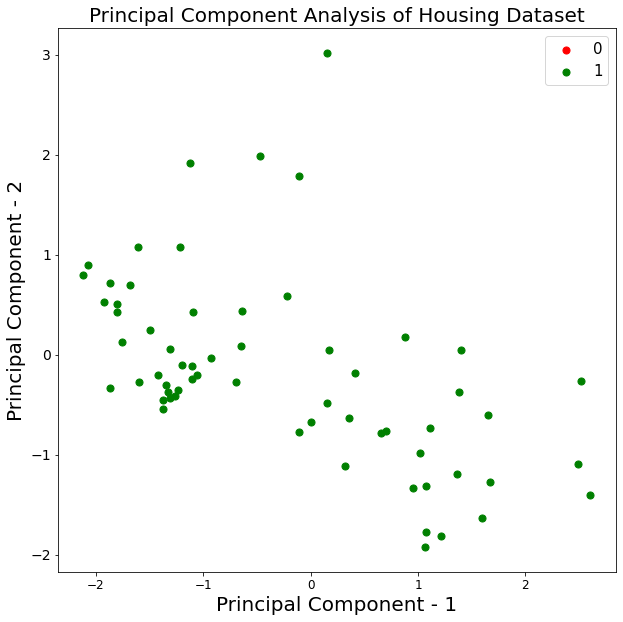

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Housing Dataset",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = housing_dataset['label'] == target
    plt.scatter(principal_housing_DF.loc[indicesToKeep, 'principal component1']
               , principal_housing_DF.loc[indicesToKeep, 'principal component2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

Plotted on the graph is the similarities and dissimilarity of the size of california houses based on location and also based on the income of the owners. 